# Estimating parameters of a normal distribution

In [1]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az

pm.__version__

'5.0.2'

In [2]:
from platform import python_version
python_version()

'3.11.0'

Suppose we have some data that we think is sampled from a normal distribution

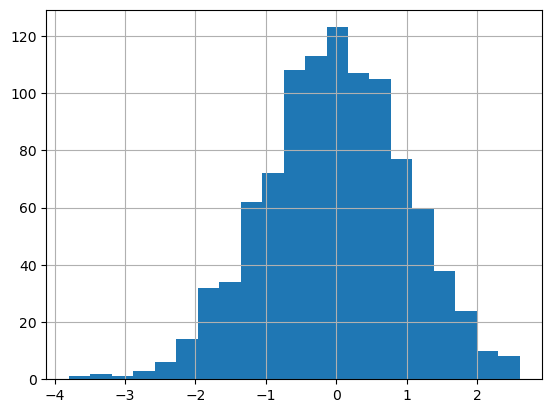

In [3]:
data = np.random.normal(loc=0, scale=1, size=1000)
plt.hist(data, bins=21)
plt.grid()

Define a simulator

In [4]:
def normal_sim(rng, a, b, size=1000):
    return rng.normal(a, b, size=size)

Sequential Monte Carlo (SMC) - Approximate Bayesian Computation (ABC)

In [5]:
with pm.Model() as example:
    a = pm.Normal("a", mu=0, sigma=5)
    b = pm.HalfNormal("b", sigma=1)
    s = pm.Simulator("s", normal_sim, params=(a, b), sum_stat="sort", epsilon=1, observed=data)

    idata = pm.sample_smc(progressbar=False)  # getting errors with the progress bar
    idata.extend(pm.sample_posterior_predictive(idata))

Initializing SMC sampler...
Sampling 4 chains in 4 jobs


Sampling: [s]


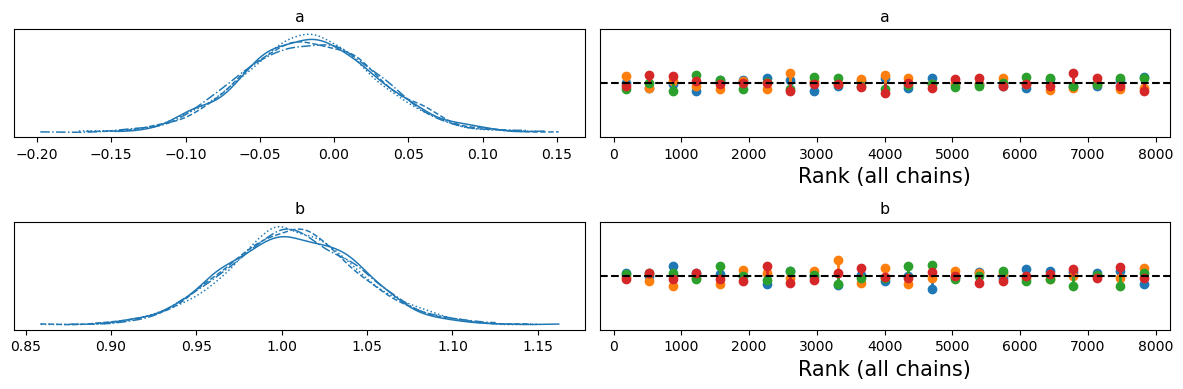

In [6]:
az.plot_trace(idata, kind="rank_vlines")
plt.tight_layout()